In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Example training images and their Labels :  ['frog', 'truck', 'truck', 'deer', 'automobile', 'automobile', 'bird', 'horse', 'ship', 'cat']


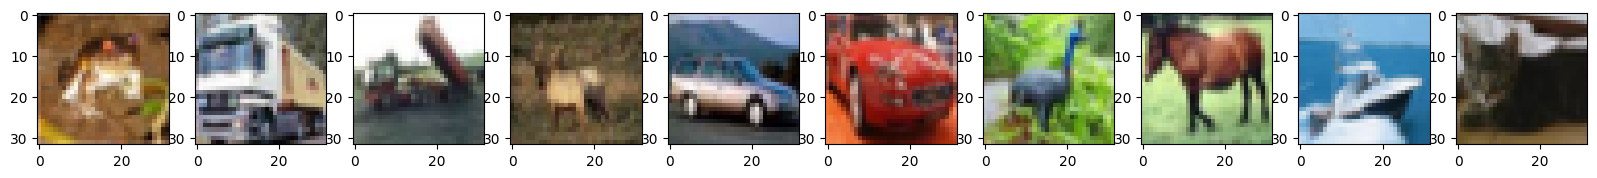

In [3]:
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

print("Example training images and their Labels : ", str([cifar10_classes[x[0]] for x in y_train[0:10]]))

fig, axarr = plt.subplots(1,10)
fig.set_size_inches(20,6)

for i in range(10):
    image= x_train[i]
    axarr[i].imshow(image)
plt.show()

In [4]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [5]:
X_train = x_train /255.0
X_test = x_test/255.0

In [6]:
# BUILDING A ARTIFICIAL NEURAL NETWORK

In [7]:
"""
MLP Network

=> Input  Layer - Flatten
=> Hidden Layer - 2048, AF = "RELU"
=> Output Layer =- 10, AF-Softmax
"""

'\nMLP Network\n\n=> Input  Layer - Flatten\n=> Hidden Layer - 2048, AF = "RELU"\n=> Output Layer =- 10, AF-Softmax\n'

In [8]:
from tensorflow import keras
from keras.layers import Dense
from keras.layers import Flatten

In [9]:
ann = keras.Sequential()
ann.add(Flatten(input_shape=(32,32,3))) #Input Layer
ann.add(Dense(2048, activation="relu"))# Hidden Layer
ann.add(Dense(10, activation="softmax"))#Output Layer

In [10]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 2048)              6293504   
                                                                 
 dense_1 (Dense)             (None, 10)                20490     
                                                                 
Total params: 6,313,994
Trainable params: 6,313,994
Non-trainable params: 0
_________________________________________________________________


In [11]:
ann.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [12]:
history = ann.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
1563/1563 [==============================] - 10s 5ms/step - loss: 1.9324 - accuracy: 0.3255 - val_loss: 1.7557 - val_accuracy: 0.3584
Epoch 2/100
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6851 - accuracy: 0.3970 - val_loss: 1.6127 - val_accuracy: 0.4196
Epoch 3/100
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6168 - accuracy: 0.4241 - val_loss: 1.6097 - val_accuracy: 0.4328
Epoch 4/100
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5684 - accuracy: 0.4445 - val_loss: 1.5663 - val_accuracy: 0.4414
Epoch 5/100
1563/1563 [==============================] - 10s 7ms/step - loss: 1.5381 - accuracy: 0.4514 - val_loss: 1.5465 - val_accuracy: 0.4592
Epoch 6/100
1563/1563 [==============================] - 10s 6ms/step - loss: 1.5080 - accuracy: 0.4644 - val_loss: 1.5519 - val_accuracy: 0.4448
Epoch 7/100
1563/1563 [==============================] - 11s 7ms/step - loss: 1.4899 - accuracy: 0.4726 - val_loss: 1.5585 - 

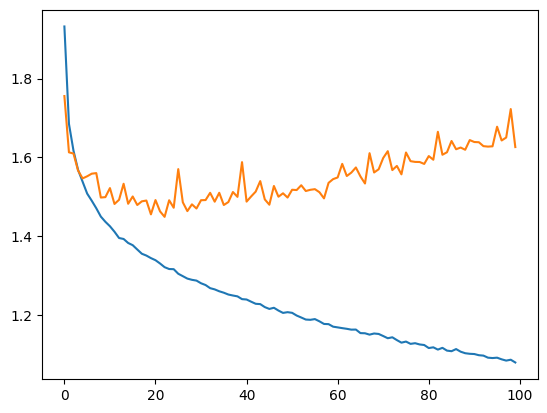

In [13]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

In [14]:
# CNN MODEL

In [15]:
from tensorflow import keras
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout

In [16]:
cnn = keras.Sequential()
cnn.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32,32,3)))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu"))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu"))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Conv2D(256, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu"))
cnn.add(MaxPooling2D((2,2)))
cnn.add(Flatten())
cnn.add(Dense(64, activation="relu")) # Hidden Layer
cnn.add(Dropout(0.3))
cnn.add(Dense(10, activation="softmax")) #Output Layer

In [17]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)       

In [18]:
cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = cnn.fit(X_train, y_train , epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
1563/1563 [==============================] - 35s 7ms/step - loss: 1.5894 - accuracy: 0.4127 - val_loss: 1.2063 - val_accuracy: 0.5586
Epoch 2/100
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1260 - accuracy: 0.6037 - val_loss: 0.9621 - val_accuracy: 0.6623
Epoch 3/100
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9163 - accuracy: 0.6826 - val_loss: 0.8749 - val_accuracy: 0.6982
Epoch 4/100
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7890 - accuracy: 0.7321 - val_loss: 0.8175 - val_accuracy: 0.7196
Epoch 5/100
1563/1563 [==============================] - 13s 8ms/step - loss: 0.6919 - accuracy: 0.7609 - val_loss: 0.8552 - val_accuracy: 0.7189
Epoch 6/100
1563/1563 [==============================] - 13s 8ms/step - loss: 0.6096 - accuracy: 0.7900 - val_loss: 0.7718 - val_accuracy: 0.7433
Epoch 7/100
1563/1563 [==============================] - 12s 8ms/step - loss: 0.5364 - accuracy: 0.8136 - val_loss: 0.7640 -

In [19]:
def plotLosses(history):
    plt.plot(history.history["loss"])
    plt.plot(history.history["val_loss"])
    plt.title("Model Loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper right")
    plt.show()

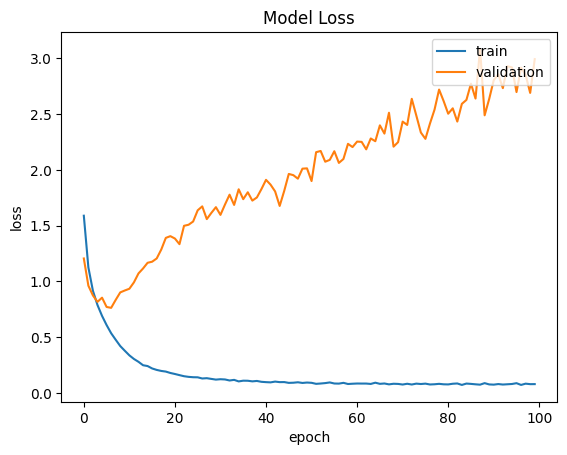

In [20]:
plotLosses(history)

In [21]:
def plotAccuracy(history):
    plt.plot(history.history["accuracy"])
    plt.plot(history.history["val_accuracy"])
    plt.title("Model Accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

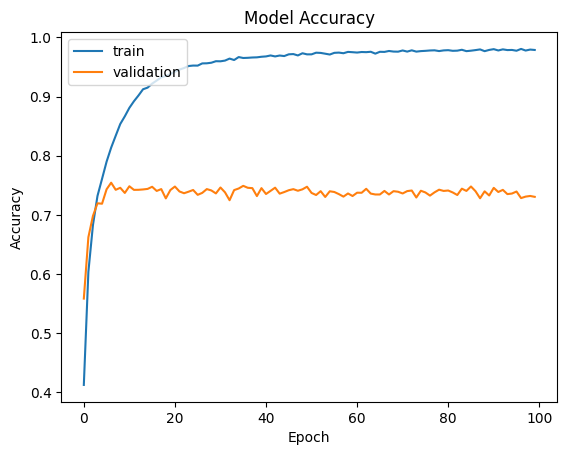

In [22]:
plotAccuracy(history)

In [25]:
score = cnn.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 2.9921 - accuracy: 0.7305


In [26]:
print(cnn.metrics_names)
print(score)

['loss', 'accuracy']
[2.992098569869995, 0.7304999828338623]


In [ ]:
from keras.models import load_model

cnn.save("cifar10_model.h5")